In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob

%matplotlib inline

In [51]:
def show_plt(f):
    df = pd.read_csv(f)
    plt.scatter(df['x'], df['y'], c=df['color'])
    plt.title(f)
    plt.show()

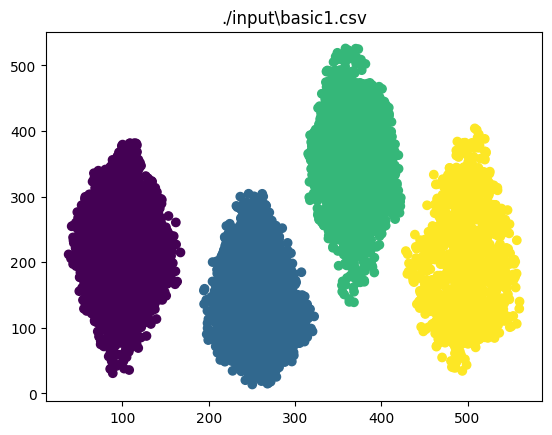

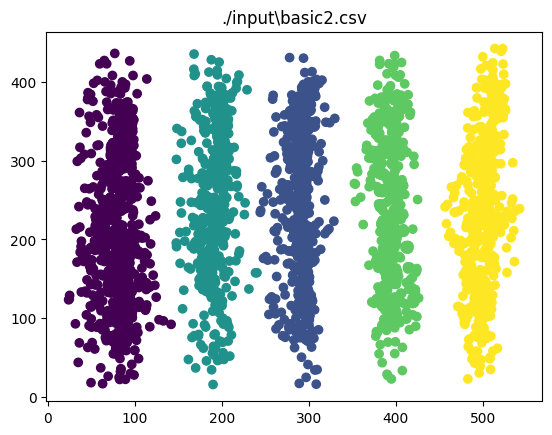

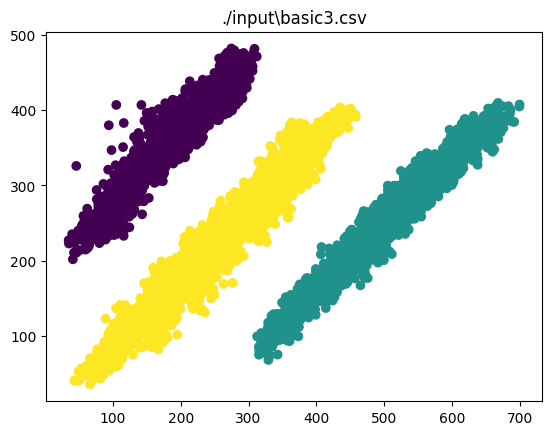

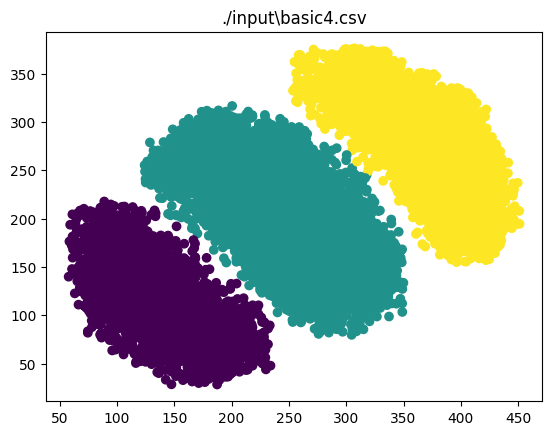

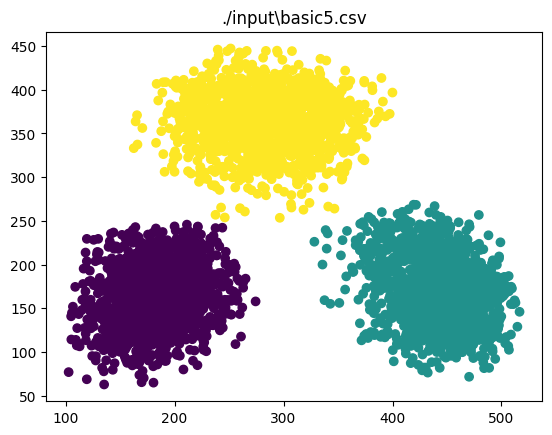

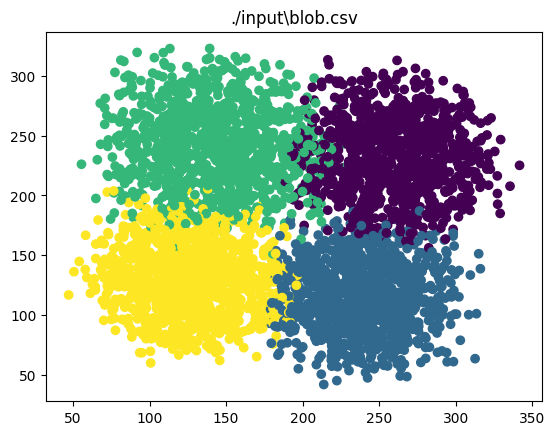

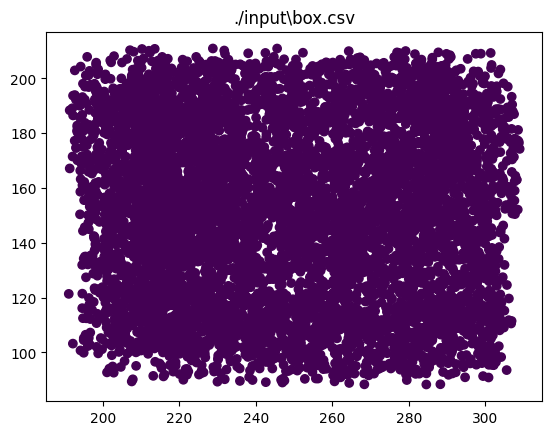

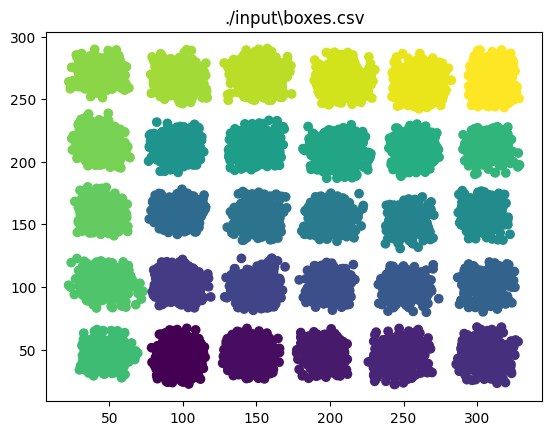

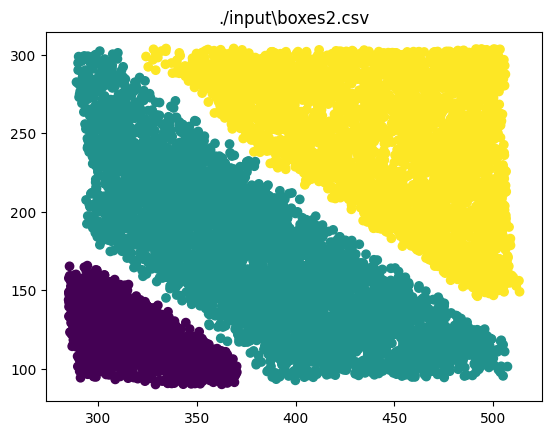

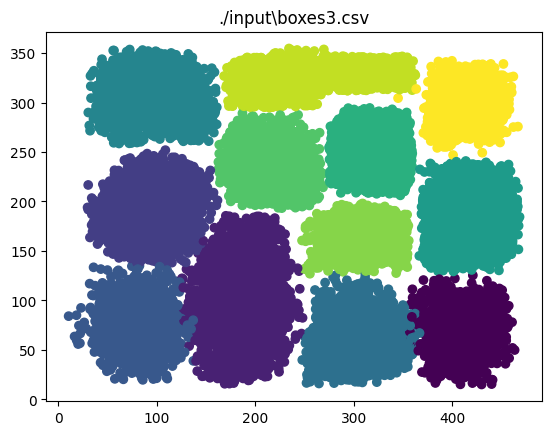

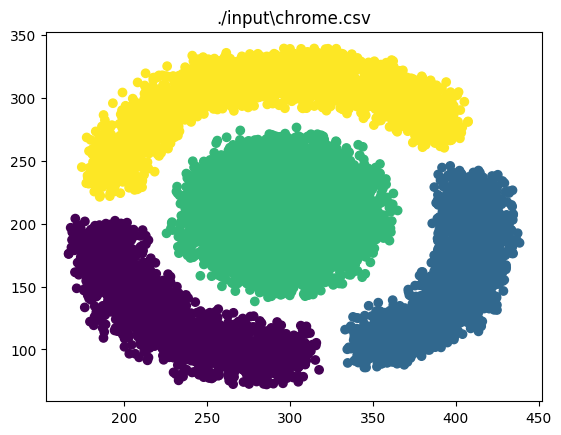

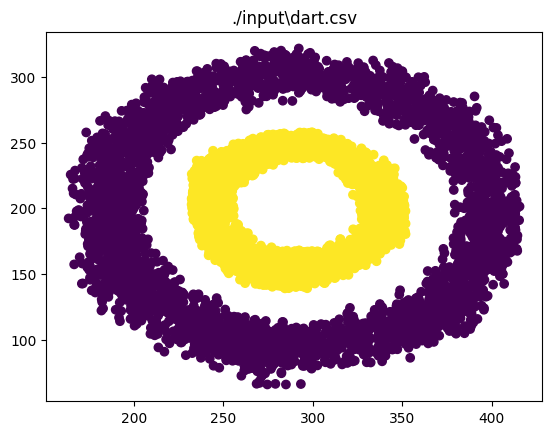

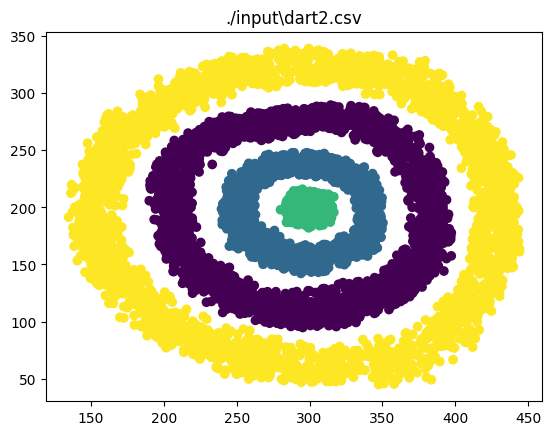

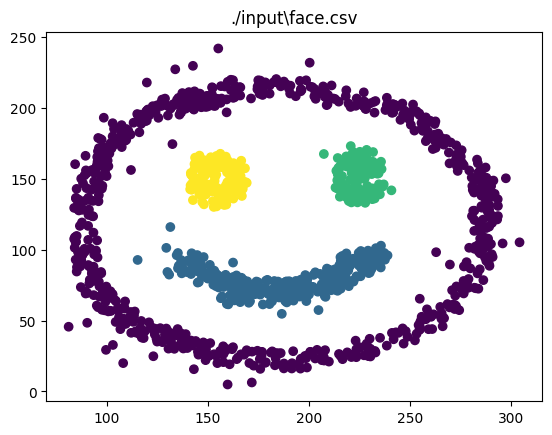

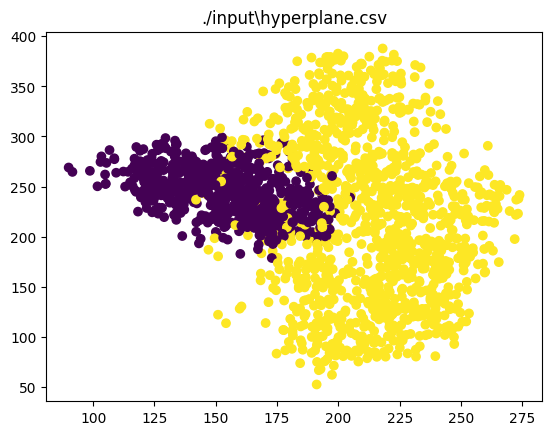

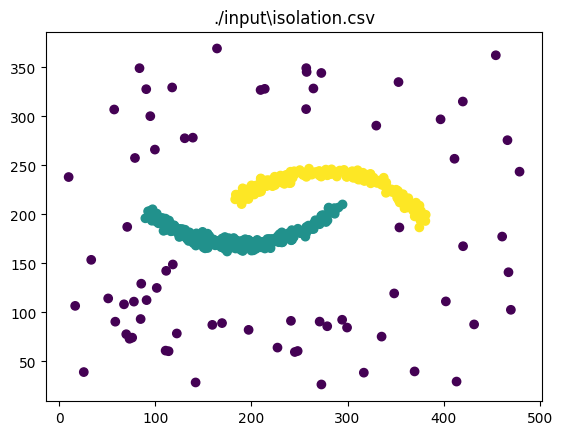

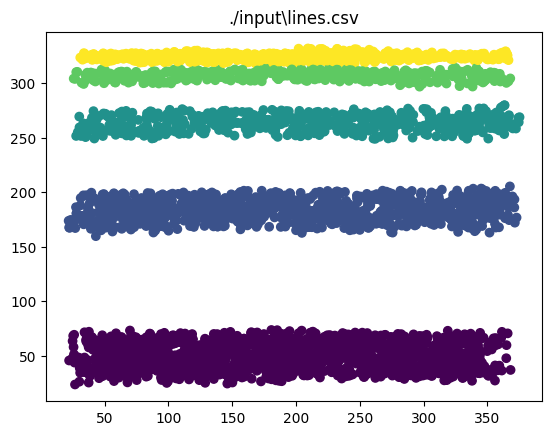

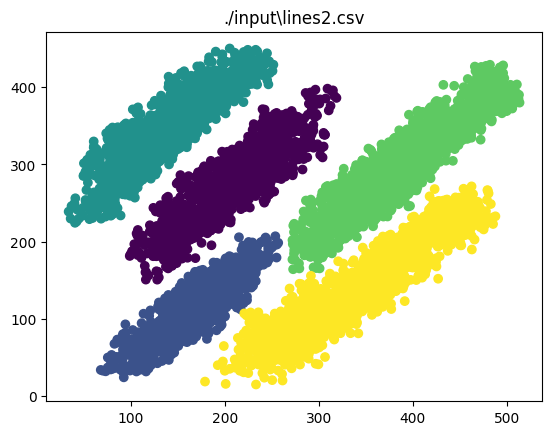

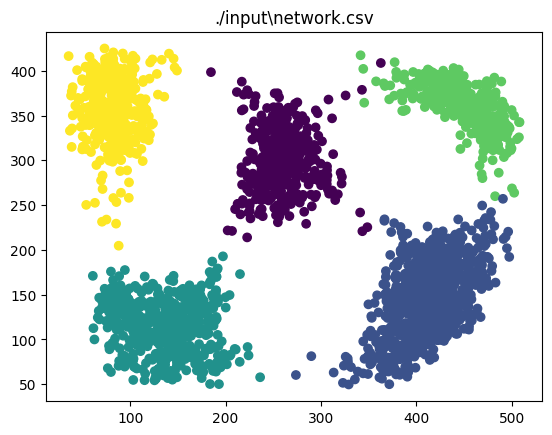

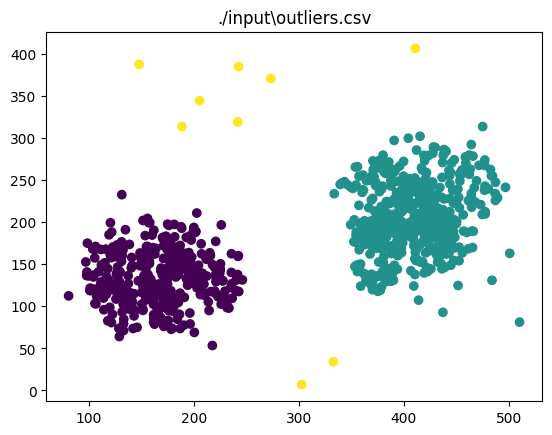

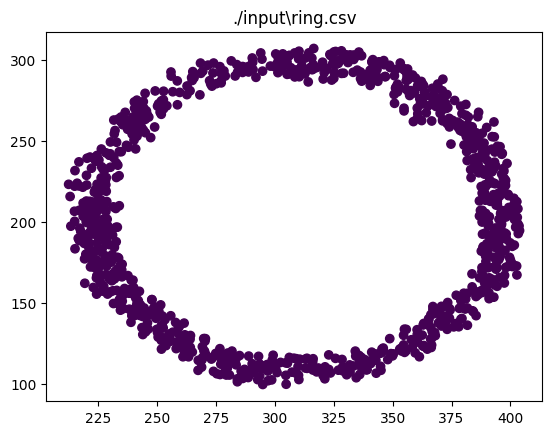

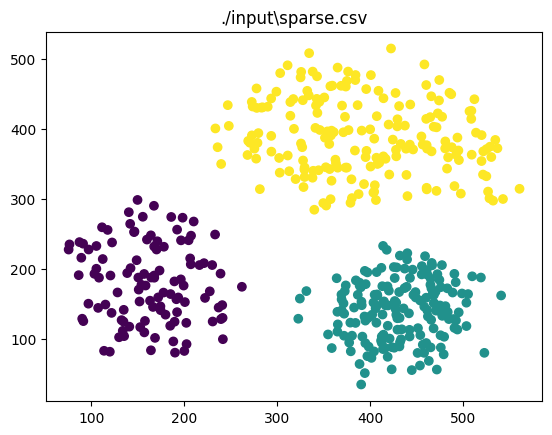

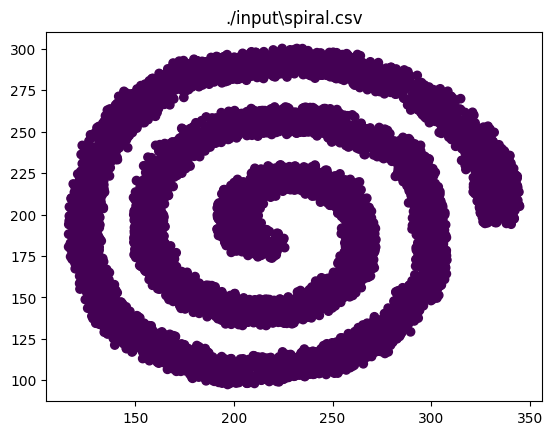

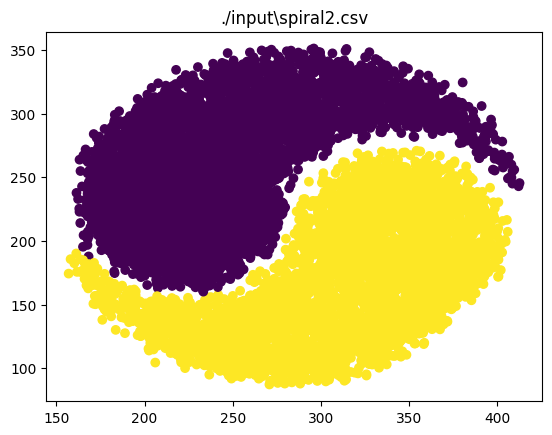

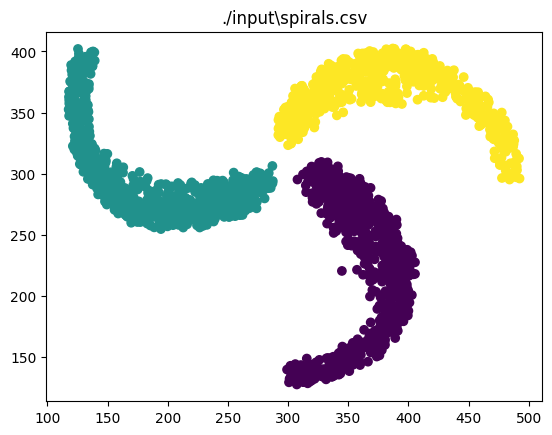

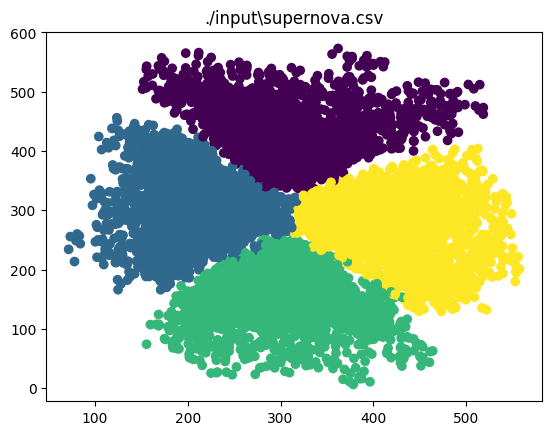

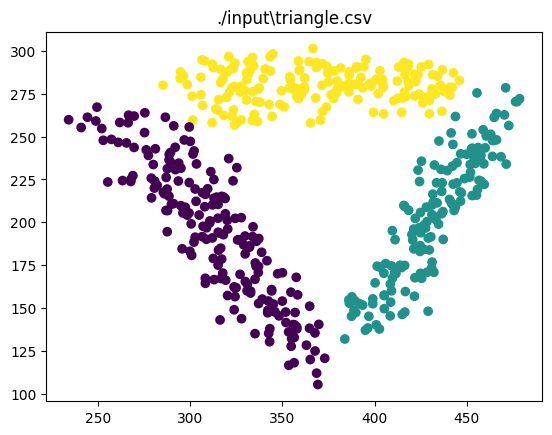

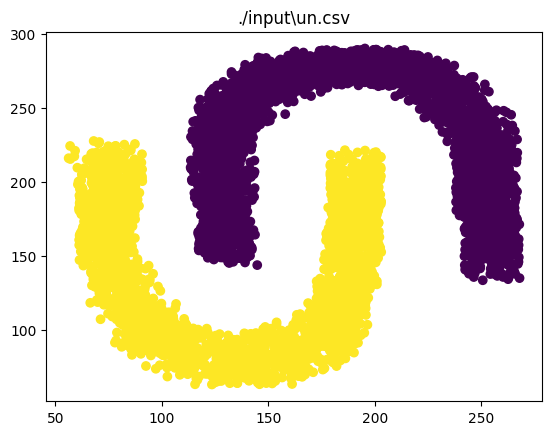

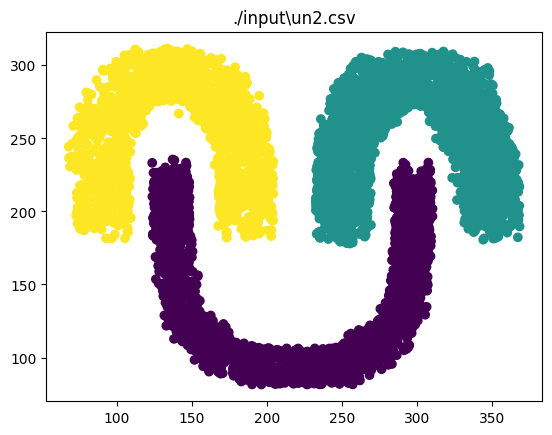

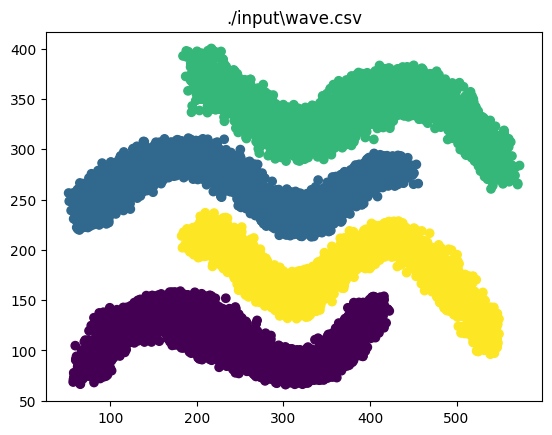

In [52]:
path = "./input/*"
files = glob(path)
for f in files:
    show_plt(f)

### 이 데이터로 쓸거임

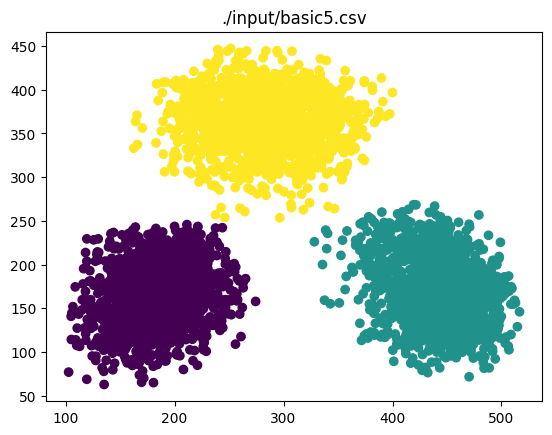

In [302]:
file = "./input/basic5.csv"
show_plt(file)

### init

In [328]:
SEED = 123
threshold = 0.001
MAX_DIST = 1e9

df = pd.read_csv(file)
data = df.values
N = df.shape[0]
K = 3
rndf = np.random.uniform

np.random.seed(SEED)
C = [[rndf(0, 600), rndf(0, 600)] for _ in range(K)]
membership = np.array([np.random.randint(0, K) for _ in range(N)])

In [329]:
def display_result():
    plt.scatter(df['x'], df['y'], c=membership)
    plt.scatter(*zip(*C), color='red', label='centroid')
    plt.legend()
    plt.show()

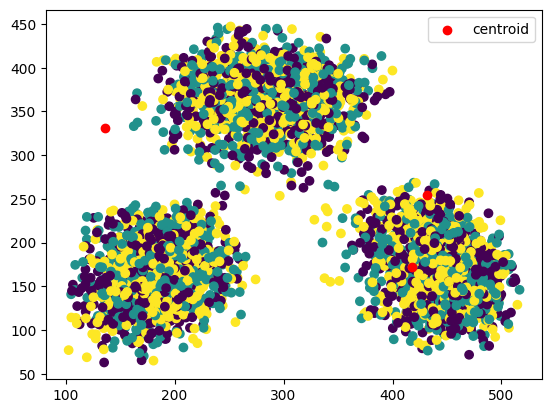

In [330]:
display_result()

### train

In [331]:
def square(n): return n*n

def get_dist(x, y, a, b):
    return np.sqrt(square(x-a)+square(y-b))

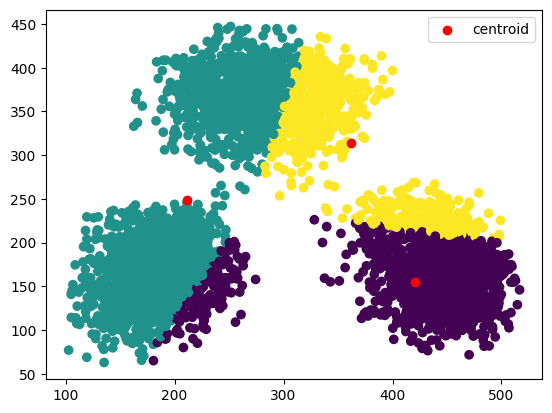

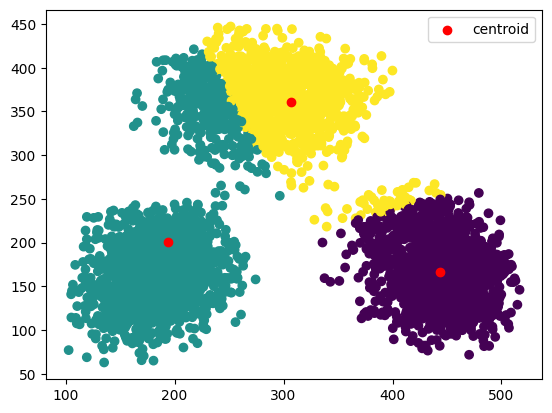

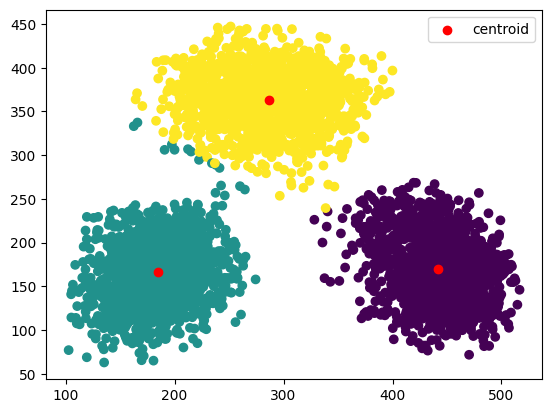

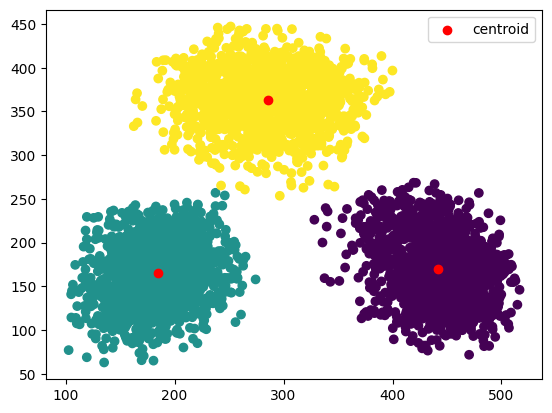

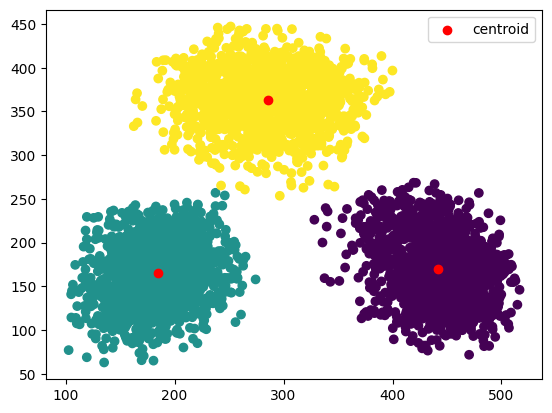

In [332]:
delta = 100
while delta/N > threshold:
    delta = 0
    for ind, r in enumerate(data):
        min_dist = MAX_DIST
        member = 1
        # get the nearest centroid
        for c_ind, (x, y) in enumerate(C):
            d = get_dist(x, y, r[0], r[1])
            if d < min_dist:
                min_dist = d
                member = c_ind
        
        if membership[ind] != member:
            membership[ind] = member
            delta += 1
    
    # adjust centrid
    for c_ind in range(K):
        mask = membership == c_ind
        tmp = data[mask]
        total_x = tmp[:, 0]
        total_y = tmp[:, 1]
        C[c_ind][0] = total_x.mean()
        C[c_ind][1] = total_y.mean()

    display_result()